In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

images_path = "/content/drive/MyDrive/Godoy (1)/Godoy"
image_list = []

for image in os.listdir(images_path):
  image_path = os.path.join(images_path, image)
  image_list.append(image_path)

array([[[112, 112, 112],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [112, 112, 112]],

       [[112, 112, 112],
        [112, 112, 112],
        [114, 114, 114],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [112, 112, 112]],

       [[111, 111, 111],
        [112, 112, 112],
        [114, 114, 114],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [112, 112, 112]],

       ...,

       [[111, 111, 111],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [  6,   6,   6],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[111, 111, 111],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[111, 111, 111],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]]], dtype=uint8)
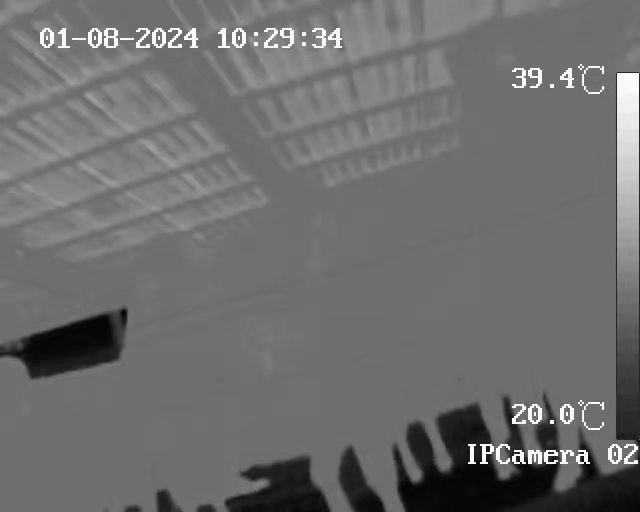

In [3]:
import cv2 as cv

cv.imread("/content/drive/MyDrive/Godoy (1)/Godoy/01-08-24_video1_00000000205000400_0.png")

array([[[ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [ 18,  18,  18],
        [ 13,  13,  13],
        [ 11,  11,  11]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [ 19,  19,  19],
        [ 14,  14,  14],
        [ 12,  12,  12]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [ 20,  20,  20],
        [ 14,  14,  14],
        [ 13,  13,  13]],

       ...,

       [[172, 172, 172],
        [172, 172, 172],
        [172, 172, 172],
        ...,
        [152, 152, 152],
        [152, 152, 152],
        [152, 152, 152]],

       [[172, 172, 172],
        [172, 172, 172],
        [172, 172, 172],
        ...,
        [152, 152, 152],
        [152, 152, 152],
        [152, 152, 152]],

       [[172, 172, 172],
        [172, 172, 172],
        [172, 172, 172],
        ...,
        [153, 153, 153],
        [153, 153, 153],
        [153, 153, 153]]], dtype=uint8)
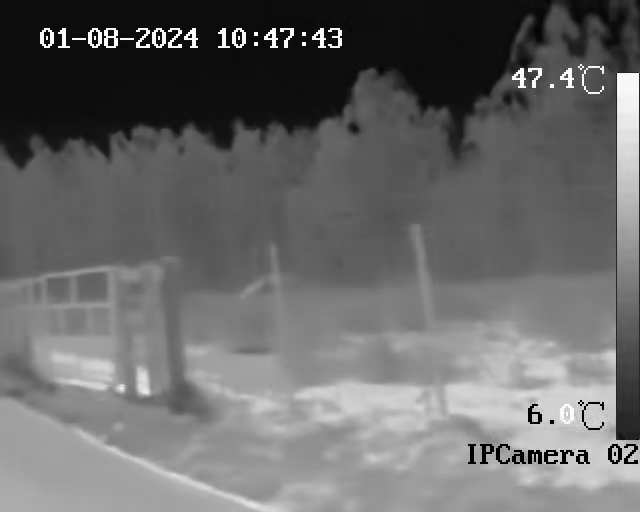

In [4]:
import random

random_index = random.randint(0, len(image_list) - 1)
cv.imread(image_list[random_index])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
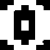

In [5]:
import cv2

cv2.imread('/content/drive/MyDrive/digits (1)/black2/0_white.png', 0)

In [ ]:
import cv2
import numpy as np
import os

def process_digit_templates(input_folder, output_folder, target_size=(50, 50)):
    # Cria a pasta de saída se não existir
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Lista todos os arquivos na pasta de entrada
    files = os.listdir(input_folder)

    for file in files:
        if file.endswith('.png'):  # Processa apenas arquivos PNG
            # Lê a imagem
            img_path = os.path.join(input_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Inverte a imagem (assume que o dígito é mais escuro que o fundo)
            img = cv2.bitwise_not(img)

            # Aplica threshold para binarizar a imagem
            _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

            # Encontra os contornos
            contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if contours:
                # Encontra o maior contorno (assumindo que é o dígito)
                c = max(contours, key=cv2.contourArea)

                # Obtém o retângulo delimitador
                x, y, w, h = cv2.boundingRect(c)

                # Recorta o dígito
                digit = img[y:y+h, x:x+w]

                # Redimensiona para o tamanho alvo
                digit_resized = cv2.resize(digit, target_size, interpolation=cv2.INTER_AREA)

                # Cria uma imagem preta do tamanho alvo
                final_img = np.zeros(target_size, dtype=np.uint8)

                # Calcula a posição para centralizar o dígito
                x_offset = (target_size[0] - digit_resized.shape[1]) // 2
                y_offset = (target_size[1] - digit_resized.shape[0]) // 2

                # Coloca o dígito redimensionado na imagem preta
                final_img[y_offset:y_offset+digit_resized.shape[0],
                          x_offset:x_offset+digit_resized.shape[1]] = digit_resized

                # Salva a imagem processada
                output_path = os.path.join(output_folder, file)
                cv2.imwrite(output_path, final_img)

                print(f"Processado: {file}")
            else:
                print(f"Nenhum contorno encontrado em: {file}")

# Uso da função
input_folder = '/content/drive/MyDrive/temperature_digits/white_digit'
output_folder = '/content/drive/MyDrive/temperature_digits/white_digit2'
process_digit_templates(input_folder, output_folder)

Processado: 4_white.png
Processado: 3_white.png
Processado: 1_white.png
Processado: 5_white.png
Processado: 6_white.png
Processado: 2_white.png
Processado: 0_white.png
Processado: 9_white.png
Processado: minus_white.png
Nenhum contorno encontrado em: nothing_white.png
Processado: 7_white.png
Processado: 8_white.png


In [6]:
import cv2
import numpy as np
import os

def process_digit_templates(input_folder, output_folder, target_size=(50, 50)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    files = os.listdir(input_folder)

    for file in files:
        if file.endswith('.png'):
            img_path = os.path.join(input_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Inverte a imagem para tornar o dígito branco e o fundo preto
            img = cv2.bitwise_not(img)

            # Aplica threshold para binarizar a imagem
            _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

            # Encontra os contornos
            contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if contours:
                c = max(contours, key=cv2.contourArea)
                x, y, w, h = cv2.boundingRect(c)
                digit = img[y:y+h, x:x+w]
                digit_resized = cv2.resize(digit, target_size, interpolation=cv2.INTER_AREA)

                # Cria uma imagem branca do tamanho alvo
                final_img = np.full(target_size, 255, dtype=np.uint8)

                x_offset = (target_size[0] - digit_resized.shape[1]) // 2
                y_offset = (target_size[1] - digit_resized.shape[0]) // 2

                # Coloca o dígito redimensionado na imagem branca
                final_img[y_offset:y_offset+digit_resized.shape[0],
                          x_offset:x_offset+digit_resized.shape[1]] = digit_resized

                output_path = os.path.join(output_folder, file)
                cv2.imwrite(output_path, final_img)

                print(f"Processado: {file}")
            else:
                print(f"Nenhum contorno encontrado em: {file}")

# Uso da função
input_folder = '/content/drive/MyDrive/temperature_digits/white_digit2'
output_folder = '/content/drive/MyDrive/temperature_digits/black_digit_white_background'
process_digit_templates(input_folder, output_folder)

Nenhum contorno encontrado em: nothing_white.png
Processado: 4_white.png
Processado: 3_white.png
Processado: 1_white.png
Processado: 2_white.png
Processado: 5_white.png
Processado: 6_white.png
Processado: minus_white.png
Processado: 9_white.png
Processado: 0_white.png
Processado: 7_white.png
Processado: 8_white.png


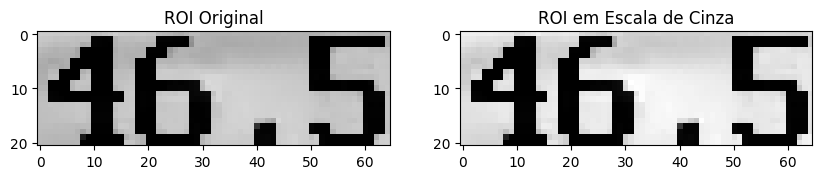

Número reconhecido: 45.5


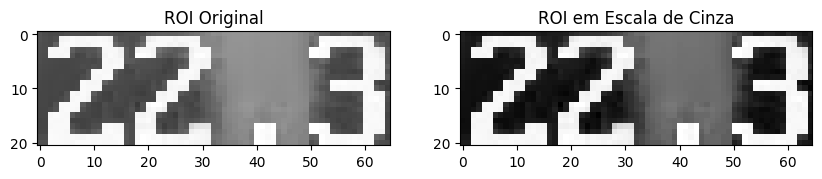

Número reconhecido: 22.3
Temperatura alta: 45.5°C
Temperatura baixa: 22.3°C
Temperatura do pixel (100, 100): 35.04°C


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Carregar os templates
digit_templates = {
    '0': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/0_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/0_white.png', 0)},
    '1': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/1_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/1_white.png', 0)},
    '2': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/2_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/2_white.png', 0)},
    '3': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/3_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/3_white.png', 0)},
    '4': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/4_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/4_white.png', 0)},
    '5': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/5_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/5_white.png', 0)},
    '6': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/6_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/6_white.png', 0)},
    '7': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/7_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/7_white.png', 0)},
    '8': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/8_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/8_white.png', 0)},
    '9': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/9_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/9_white.png', 0)},
    'nothing': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/nothing_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/nothing_white.png', 0)},
    'minus': {'black': cv2.imread('/content/drive/MyDrive/temperature_digits/black_digit2/minus_white.png', 0), 'white': cv2.imread('/content/drive/MyDrive/temperature_digits/white_digit2/minus_white.png', 0)},
}

def compare_digits(digit, template):
    try:
        template_resized = cv2.resize(template, (digit.shape[1], digit.shape[0]))
        diff = cv2.absdiff(digit, template_resized)
        return np.sum(diff)
    except:
        return float('inf')

def recognize_digit(digit):
    best_match = None
    best_score = float('inf')

    for template_digit, templates in digit_templates.items():
        score_black = compare_digits(digit, templates['black'])
        score_white = compare_digits(digit, templates['white'])
        score = min(score_black, score_white)

        if score < best_score:
            best_score = score
            best_match = template_digit

    return '0' if best_match == 'nothing' else best_match

def extract_temperature(image, x1, y1, x2, y2):
    roi = image[y1:y2, x1:x2]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title('ROI Original')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.title('ROI em Escala de Cinza')
    plt.show()

    # Convertendo para escala de cinza para manter a compatibilidade com os templates
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    digit1 = gray_roi[:, :16]
    digit2 = gray_roi[:, 16:32]
    digit3 = gray_roi[:, 48:64]

    recognized_digit1 = recognize_digit(digit1)
    recognized_digit2 = recognize_digit(digit2)
    recognized_digit3 = recognize_digit(digit3)

    # Tratamento do sinal de menos
    if recognized_digit1 == 'minus':
        recognized_number = f"-{recognized_digit2}.{recognized_digit3}"
    else:
        recognized_number = f"{recognized_digit1}{recognized_digit2}.{recognized_digit3}"

    print(f"Número reconhecido: {recognized_number}")

    try:
        return float(recognized_number)
    except ValueError:
        return None

def process_thermal_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Não foi possível ler a imagem: {image_path}")
        return

    temp_high = extract_temperature(img, 510, 67, 575, 88)
    temp_low = extract_temperature(img, 510, 403, 575, 424)

    if temp_high is not None and temp_low is not None:
        print(f"Temperatura alta: {temp_high}°C")
        print(f"Temperatura baixa: {temp_low}°C")

        temp_range = temp_high - temp_low

        def get_pixel_temp(pixel_value):
            normalized = pixel_value / 255.0
            return temp_low + (normalized * temp_range)

        x, y = 100, 100
        pixel_value = img[y, x, 0]
        pixel_temp = get_pixel_temp(pixel_value)
        print(f"Temperatura do pixel ({x}, {y}): {pixel_temp:.2f}°C")
    else:
        print("Não foi possível extrair as temperaturas da imagem.")

random_index = random.randint(0, len(image_list) - 1)
image_path = image_list[random_index]
process_thermal_image(image_path)

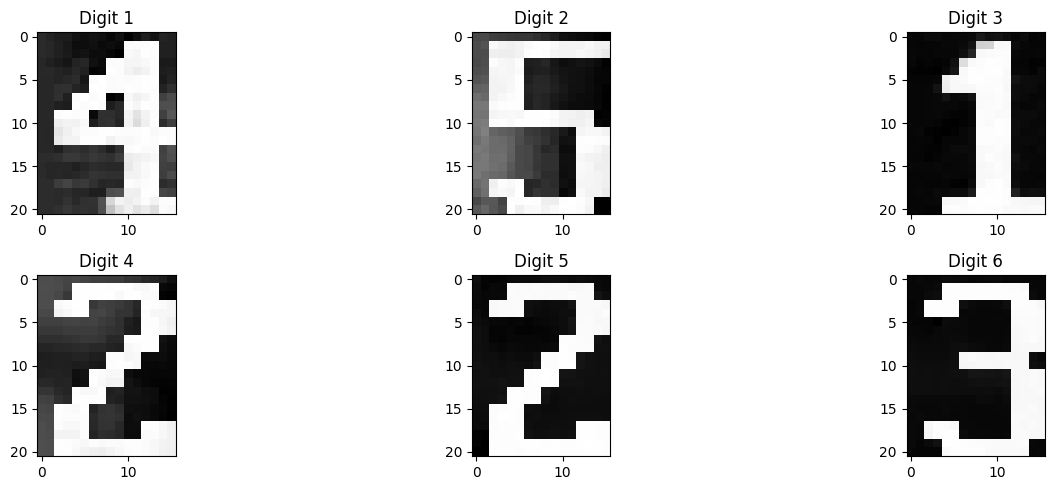


Processando imagem: /content/drive/MyDrive/Godoy (1)/Godoy/01-08-24_video1_00000000205000400_102584.png
Digite os rótulos para cada dígito (0-9, nothing, minus, ou 's' para pular):
Digite 'H' para confirmar os rótulos após inserir todos eles ou 'Q' para sair.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from IPython.display import display, clear_output

BASE_SAVE_DIR = '/content/drive/MyDrive/digits_label'

def extract_digits(image, x1, y1, x2, y2):
    roi = image[y1:y2, x1:x2]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    digit1 = gray_roi[:, :16]
    digit2 = gray_roi[:, 16:32]
    digit3 = gray_roi[:, 48:64]

    return [digit1, digit2, digit3]

def save_digit(digit, label, index):
    label_dir = os.path.join(BASE_SAVE_DIR, label)
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)
    file_path = os.path.join(label_dir, f'{label}_{index}.png')
    cv2.imwrite(file_path, digit)
    print(f"Dígito salvo em: {file_path}")

def process_thermal_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Não foi possível ler a imagem: {image_path}")
        return False

    digits_high = extract_digits(img, 510, 67, 575, 88)
    digits_low = extract_digits(img, 510, 403, 575, 424)

    all_digits = digits_high + digits_low

    plt.figure(figsize=(15, 5))
    for i, digit in enumerate(all_digits):
        plt.subplot(2, 3, i+1)
        plt.imshow(digit, cmap='gray')
        plt.title(f'Digit {i+1}')
    plt.tight_layout()
    display(plt.gcf())
    plt.close()

    print(f"\nProcessando imagem: {image_path}")
    print("Digite os rótulos para cada dígito (0-9, nothing, minus, ou 's' para pular):")
    print("Digite 'H' para confirmar os rótulos após inserir todos eles ou 'Q' para sair.")

    while True:
        labels = []
        for i in range(6):
            label = input(f"Dígito {i+1}: ").lower()
            if label == 'q':
                return False  # Sinaliza para sair do programa
            labels.append(label)

        confirm = input("Digite 'H' para confirmar ou qualquer outra tecla para reinserir os rótulos: ").lower()
        if confirm == 'h':
            break
        elif confirm == 'q':
            return False  # Sinaliza para sair do programa
        else:
            print("Reinserindo rótulos...")

    print("\nConfirmando rótulos...")
    for i, (digit, label) in enumerate(zip(all_digits, labels)):
        if label in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'nothing', 'minus']:
            save_digit(digit, label, len(glob.glob(os.path.join(BASE_SAVE_DIR, label, '*.png'))))
            print(f"Dígito {i+1} salvo como '{label}'")
        elif label == 's':
            print(f"Dígito {i+1} pulado")
        else:
            print(f"Rótulo inválido para Dígito {i+1}: '{label}'. Não salvo.")

    print("\nTodos os dígitos desta imagem foram processados.")
    return True  # Sinaliza para continuar para a próxima imagem

for image_path in image_list:
    should_continue = process_thermal_image(image_path)
    if not should_continue:
        print("Programa encerrado pelo usuário.")
        break
    clear_output(wait=True)

print("Todas as imagens foram processadas ou o programa foi encerrado.")

Número total de imagens rotuladas: 865

Distribuição de rótulos:
0: 34 (3.93%)
1: 132 (15.26%)
2: 193 (22.31%)
3: 61 (7.05%)
4: 235 (27.17%)
5: 60 (6.94%)
6: 41 (4.74%)
7: 17 (1.97%)
8: 28 (3.24%)
9: 41 (4.74%)
nothing: 19 (2.20%)
minus: 4 (0.46%)


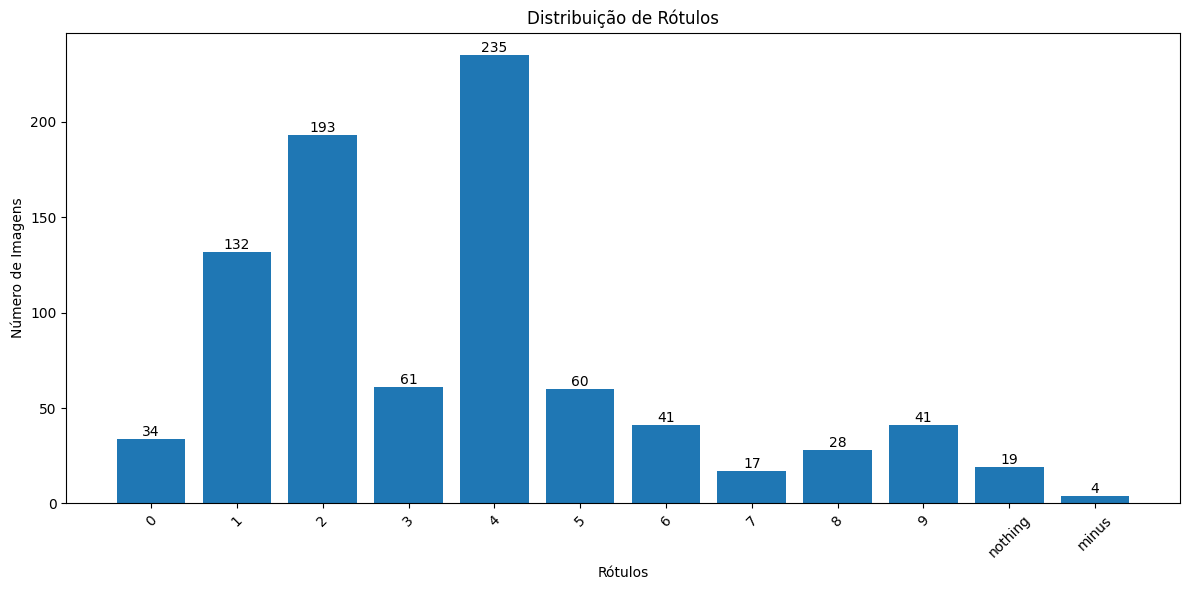

In [ ]:
import os
import matplotlib.pyplot as plt

BASE_SAVE_DIR = '/content/drive/MyDrive/digits_label'

def analyze_label_distribution():
    # Dicionário para armazenar a contagem de cada rótulo
    label_counts = {}

    # Lista de todos os rótulos possíveis
    all_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'nothing', 'minus']

    # Contagem de imagens para cada rótulo
    for label in all_labels:
        label_dir = os.path.join(BASE_SAVE_DIR, label)
        if os.path.exists(label_dir):
            count = len([name for name in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, name))])
            label_counts[label] = count
        else:
            label_counts[label] = 0

    # Cálculo do total de imagens
    total_images = sum(label_counts.values())

    # Impressão dos resultados
    print(f"Número total de imagens rotuladas: {total_images}")
    print("\nDistribuição de rótulos:")
    for label, count in label_counts.items():
        percentage = (count / total_images) * 100 if total_images > 0 else 0
        print(f"{label}: {count} ({percentage:.2f}%)")

    # Criação do gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.title("Distribuição de Rótulos")
    plt.xlabel("Rótulos")
    plt.ylabel("Número de Imagens")
    plt.xticks(rotation=45)

    # Adicionar os valores em cima de cada barra
    for i, v in enumerate(label_counts.values()):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Executar a análise
analyze_label_distribution()

In [7]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_digit_data(root_dir):
    X = []
    y = []
    file_paths = []  # Adicionado para armazenar os caminhos dos arquivos

    for digit in os.listdir(root_dir):
        digit_dir = os.path.join(root_dir, digit)
        if os.path.isdir(digit_dir):
            for img_file in os.listdir(digit_dir):
                img_path = os.path.join(digit_dir, img_file)
                img = Image.open(img_path).convert('L')
                img_array = np.array(img)
                X.append(img_array)
                y.append(digit)
                file_paths.append(img_path)  # Armazena o caminho do arquivo

    return np.array(X), np.array(y), file_paths

def show_examples(X, y, file_paths, num_examples=5):
    fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))
    for i in range(num_examples):
        idx = np.random.randint(len(X))
        axes[i].imshow(X[idx], cmap='gray')
        axes[i].set_title(f"Rótulo: {y[idx]}")
        axes[i].axis('off')
        print(f"Exemplo {i+1}:")
        print(f"  Rótulo: {y[idx]}")
        print(f"  Arquivo: {os.path.basename(file_paths[idx])}")
        print(f"  Caminho: {file_paths[idx]}")
        print()
    plt.tight_layout()
    plt.show()

# Diretório raiz contendo as pastas de dígitos
root_directory = '/content/drive/MyDrive/digits_label'

# Carrega os dados
X, y, file_paths = load_digit_data(root_directory)

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Classes únicas: {np.unique(y)}")

Forma de X: (913, 21, 16)
Forma de y: (913,)
Classes únicas: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'minus' 'nothing']



Mostrando 5 exemplos aleatórios:

Exemplo 1:
  Rótulo: 1
  Arquivo: 1_111.png
  Caminho: /content/drive/MyDrive/digits_label/1/1_111.png

Exemplo 2:
  Rótulo: 2
  Arquivo: 2_92.png
  Caminho: /content/drive/MyDrive/digits_label/2/2_92.png

Exemplo 3:
  Rótulo: 4
  Arquivo: 4_229.png
  Caminho: /content/drive/MyDrive/digits_label/4/4_229.png

Exemplo 4:
  Rótulo: 6
  Arquivo: 6_2.png
  Caminho: /content/drive/MyDrive/digits_label/6/6_2.png

Exemplo 5:
  Rótulo: 7
  Arquivo: 7_13.png
  Caminho: /content/drive/MyDrive/digits_label/7/7_13.png



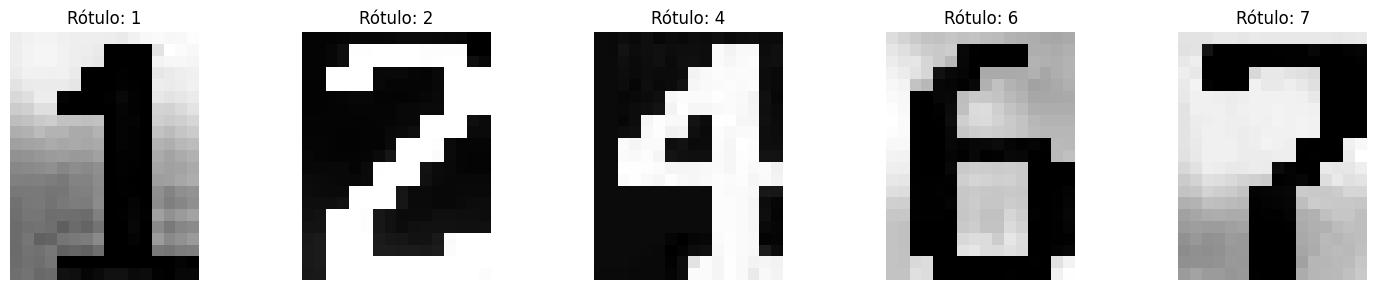

In [8]:
print("\nMostrando 5 exemplos aleatórios:\n")
show_examples(X, y, file_paths, num_examples=5)

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

def apply_data_augmentation(X, y, variations=5):
    X_augmented = []
    y_augmented = []

    # Configuração do ImageDataGenerator
    datagen = ImageDataGenerator(
        brightness_range=[0.6, 1.4],
    )

    # Codificar rótulos categóricos
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    for i in range(X.shape[0]):
        image = X[i]
        label = y_encoded[i]

        # Adicionar a imagem original
        X_augmented.append(image)
        y_augmented.append(label)

        # Gerar variações
        for _ in range(variations):
            # Adiciona uma dimensão de canal temporariamente
            temp_image = np.expand_dims(image, axis=-1)

            params = datagen.get_random_transform(temp_image.shape)
            augmented_image = datagen.apply_transform(temp_image, params)

            # Remove a dimensão de canal extra e converte para uint8
            augmented_image = np.squeeze(augmented_image).astype(np.uint8)

            # Garante que a imagem mantém as dimensões originais
            augmented_image = np.clip(augmented_image, 0, 255)

            X_augmented.append(augmented_image)
            y_augmented.append(label)

    return np.array(X_augmented), np.array(y_augmented)

# Uso da função
X_train_augmented, y_train_augmented = apply_data_augmentation(X, y)

print(f"Forma original de X[0]: {X[0].shape}")
print(f"Tipo de dados original de X[0]: {X[0].dtype}")
print(f"Forma de X_train_augmented[0]: {X_train_augmented[0].shape}")
print(f"Tipo de dados de X_train_augmented[0]: {X_train_augmented[0].dtype}")

Forma original de X[0]: (21, 16)
Tipo de dados original de X[0]: uint8
Forma de X_train_augmented[0]: (21, 16)
Tipo de dados de X_train_augmented[0]: uint8


In [10]:
X.shape, X_train_augmented.shape

((913, 21, 16), (5478, 21, 16))

In [14]:
X_train_augmented.shape

(5478, 21, 16)

In [12]:
X_train_augmented[12]

array([[133, 131, 128, 127, 121, 121, 118, 122, 126, 123, 118, 116, 121,
        127, 132, 133],
       [138, 137, 136, 139, 131, 126, 128, 131, 134, 127,   0,   0,   0,
          0, 135, 134],
       [144, 144, 146, 150, 141, 139, 138, 135, 134, 130,   0,   0,   0,
          0, 133, 133],
       [150, 151, 153, 157, 151, 144, 140, 132,   3,   0,   0,   0,   0,
          0, 127, 127],
       [160, 161, 161, 161, 156, 150, 158, 145,   2,   0,   0,   0,   0,
          0, 119, 123],
       [167, 167, 164, 168, 164, 158,   3,   1,   4,   2,   0,   0,   0,
          0, 119, 124],
       [175, 175, 179, 173, 164, 157,   2,   4,   3,   3,   0,   0,   0,
          1, 124, 128],
       [181, 181, 188, 172,   0,   1,   3,   4, 162, 153,   1,   0,   1,
          3, 134, 136],
       [183, 182, 179, 159,   0,   1,   4,  11, 166, 159,   4,   0,   0,
          2, 144, 145],
       [184, 183,   1,   4,   5,   5, 174, 185, 176, 160,   2,   0,   1,
          2, 146, 147],
       [183, 182,   4,   3,   5,   3, 169, 179, 172, 162,   1,   0,   0,
          1, 145, 147],
       [181, 181,   0,   0,   3,   3,   4,   5,   5,   4,   0,   0,   0,
          2,   0,   1],
       [180, 180,   0,   0,   4,   3,   5,   1,   5,   2,   0,   0,   0,
          2,   0,   4],
       [178, 179, 181, 183, 175, 169, 168, 170, 168, 164,   0,   0,   0,
          1, 155, 161],
       [175, 176, 180, 183, 176, 168, 169, 171, 170, 165,   0,   0,   0,
          2, 154, 161],
       [171, 173, 175, 177, 170, 169, 168, 167, 166, 160,   0,   0,   1,
          3, 146, 156],
       [166, 168, 170, 172, 166, 165, 164, 166, 164, 158,   0,   0,   0,
          3, 143, 150],
       [160, 161, 161, 162, 163, 162, 163, 164, 160, 152,   0,   0,   0,
          3, 140, 148],
       [153, 154, 156, 158, 160, 159, 158, 152, 146, 138,   0,   0,   0,
          2, 130, 138],
       [149, 151, 152, 154, 156, 155, 152, 144,   4,   5,   0,   0,   0,
          2,   1,   1],
       [149, 150, 150, 150, 152, 152, 148, 143,   4,   3,   0,   0,   0,
          2,   2,   5]], dtype=uint8)

In [13]:
y_train_augmented[12]

4

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow_model_optimization as tfmot

# Preparação dos dados
X = X_train_augmented
y = y_train_augmented

# Normalização dos dados
X = X.astype('float32') / 255.0

# Codificação dos rótulos
le = LabelEncoder()
y = le.fit_transform(y)

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionando uma dimensão de canal para as CNNs
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Criação do modelo com L2 regularization
model = models.Sequential([
    layers.Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=(21, 16, 1),
                  kernel_regularizer=regularizers.l2(0.001)),  # Reduzir L2 regularization
    layers.BatchNormalization(),
    layers.MaxPooling2D((4, 4)),
    layers.Conv2D(4, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(7, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dense(len(le.classes_), activation='softmax')
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumo do modelo
model.summary()

# Configuração do Early Stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Treinamento do modelo com Early Stopping
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 21, 16, 2)           │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 21, 16, 2)           │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 4, 2)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 5, 4, 4)             │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 5, 4, 4)             │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 4)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 12)                  │              96 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 239 (956.00 B)

 Non-trainable params: 12 (48.00 B)

Epoch 1/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.2189 - loss: 2.4081 - val_accuracy: 0.2406 - val_loss: 2.2317
Epoch 2/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4923 - loss: 1.8741 - val_accuracy: 0.3101 - val_loss: 1.9820
Epoch 3/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5124 - loss: 1.5682 - val_accuracy: 0.5895 - val_loss: 1.6571
Epoch 4/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6358 - loss: 1.3863 - val_accuracy: 0.6363 - val_loss: 1.3632
Epoch 5/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6464 - loss: 1.2667 - val_accuracy: 0.6602 - val_loss: 1.2191
Epoch 6/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6654 - loss: 1.1412 - val_accuracy: 0.7184 - val_loss: 1.0186
Epoch 7/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7078 - loss: 0.9944 - val_accuracy: 0.7355 - val_loss: 0.9322
Epoch 8/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7325 - loss: 0.9013 

In [55]:
# Avaliação do modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nAcurácia no conjunto de teste: {test_acc}')

35/35 - 0s - 4ms/step - accuracy: 0.9954 - loss: 0.0835

Acurácia no conjunto de teste: 0.9954379796981812


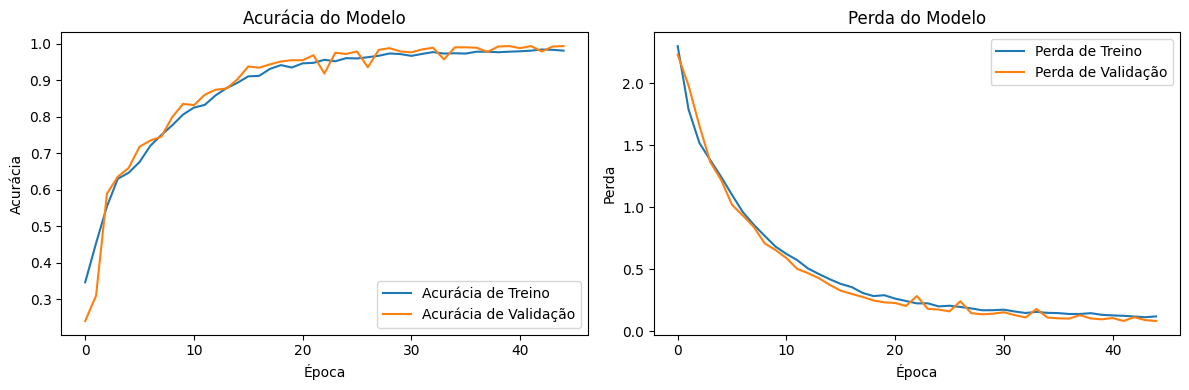

In [56]:
# Visualização do histórico de treinamento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda do Modelo')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


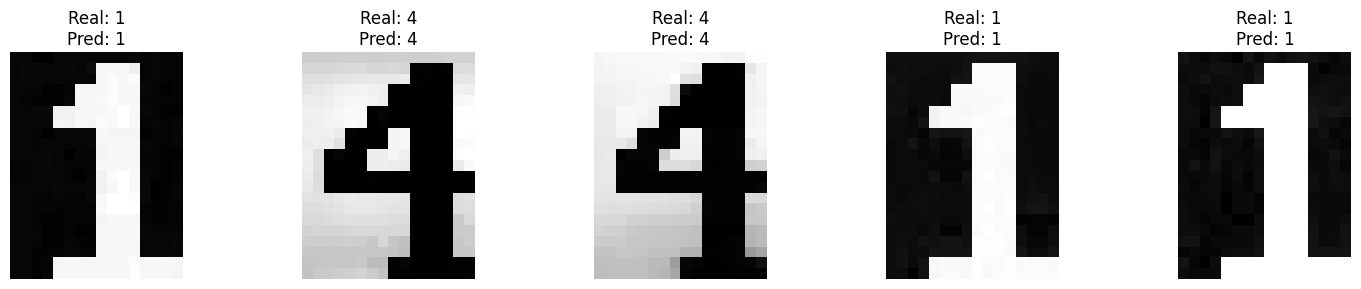

Execution time: 0.6800 seconds


In [58]:
# Função para fazer previsões e mostrar resultados
def predict_and_show(model, X, y, num_samples=5):
    # Seleciona amostras aleatórias
    indices = np.random.randint(0, X.shape[0], num_samples)
    samples = X[indices]
    true_labels = y[indices]

    # Faz previsões
    predictions = model.predict(samples)
    predicted_labels = np.argmax(predictions, axis=1)

    # Mostra os resultados
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(samples[i].squeeze(), cmap='gray')
        ax.set_title(f'Real: {le.inverse_transform([true_labels[i]])[0]}\nPred: {le.inverse_transform([predicted_labels[i]])[0]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

start_time = time.time()  # Start the timer
# Faz previsões em algumas amostras do conjunto de teste
predict_and_show(model, X_test, y_test)
end_time = time.time()  # End the timer
execution_time = end_time - start_time

In [59]:
model.save("temperature_model.h5")

In [61]:
from tensorflow.keras.models import load_model

model = load_model("/content/temperature_model.h5")

In [62]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 21, 16, 2)           │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 21, 16, 2)           │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 4, 2)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 5, 4, 4)             │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 5, 4, 4)             │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 4)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 12)                  │              96 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1016.00 B)

 Trainable params: 239 (956.00 B)

 Non-trainable params: 12 (48.00 B)

 Optimizer params: 2 (12.00 B)

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import time

model = tf.keras.models.load_model('/content/drive/MyDrive/temperature_digits/temperature_model.h5')

# Precompute the class mapping
CLASS_MAPPING = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'minus', 'nothing']

def recognize_digits(digits):
    # Preprocess all digits at once
    digits_resized = np.array([cv2.resize(digit, (16, 21)) for digit in digits])
    digits_normalized = digits_resized.astype('float32') / 255.0
    digits_ready = np.expand_dims(digits_normalized, axis=-1)

    predictions = model.predict(digits_ready)
    predicted_classes = np.argmax(predictions, axis=1)

    return [CLASS_MAPPING[cls] for cls in predicted_classes]

def extract_temperature(image, x1, y1, x2, y2):
    roi = image[y1:y2, x1:x2]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    digits = [gray_roi[:, :16], gray_roi[:, 16:32], gray_roi[:, 48:64]]
    recognized_digits = recognize_digits(digits)

    if recognized_digits[0] == 'minus':
        recognized_number = f"-{recognized_digits[1]}.{recognized_digits[2]}"
    else:
        recognized_number = f"{recognized_digits[0]}{recognized_digits[1]}.{recognized_digits[2]}"

    try:
        return float(recognized_number)
    except ValueError:
        return None

def process_thermal_image(image_path, x1, y1, x2, y2):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not read the image: {image_path}")
        return

    temp_high = extract_temperature(img, 510, 67, 575, 88)
    temp_low = extract_temperature(img, 510, 403, 575, 424)

    if temp_high is None or temp_low is None:
        print("Could not extract reference temperatures from the image.")
        return

    roi = img[y1:y2, x1:x2, 0].astype(np.float32)

    temp_range = temp_high - temp_low
    pixel_temps = temp_low + (roi / 255.0 * temp_range)

    sorted_temps = np.sort(pixel_temps.flatten())
    threshold_index = int(0.9 * sorted_temps.size)
    final_temp = np.mean(sorted_temps[threshold_index:])

    print(f"Final robust temperature: {final_temp:.2f}°C")

random_index = random.randint(0, len(image_list) - 1)
x1, y1 = 24, 24
x2, y2 = 42, 42
image_path = image_list[random_index]
start_time = time.time()  # Start the timer
process_thermal_image(image_path, x1, y1, x2, y2)
end_time = time.time()  # End the timer
print(end_time - start_time)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Could not extract reference temperatures from the image.
0.8084776401519775
